In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

data=pd.read_csv('diabetes.csv')
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
x=data.drop('SkinThickness',axis=1).values
y=data['SkinThickness'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.35,random_state=100)

from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1,normalize=True)
lasso.fit(x_train,y_train)

lasso.score(x_test,y_test)

features=data.drop('SkinThickness',axis=1).columns  
print(features)



Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [23]:
lasso =Lasso(alpha=0.1)
lasso_co=lasso.fit(x,y).coef_
print(lasso_co)

[ 0.         -0.07095017  0.10745606  0.05476603  0.61215161  3.21800512
 -0.14069228  0.        ]


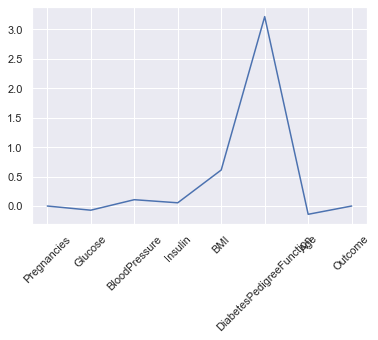

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.plot(range(len(features)),lasso_co)
plt.xticks(range(len(features)),features,rotation=45)
plt.show()